<a href="https://colab.research.google.com/github/malcolmlett/robovac/blob/main/Experiment_SLAM_data_generation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment: SLAM Data Generation (v2)
Focus:
* Building towards using the model to generate more realistic input maps.
* In this notebook we're just testing out generating datasets with matadata attached

In [ ]:
import os
if os.path.isdir('repo'):
  # discard any local changes and update
  !cd repo && git reset --hard HEAD
  !cd repo && git fetch
else:
  !git clone https://github.com/malcolmlett/robovac.git repo

# lock to revision
#!cd repo && git checkout 49c0dc5
!cd repo && git pull

import sys
sys.path.append('repo')

from general_utils import display_history
import lds
import slam
import slam_data
from importlib import reload
reload(lds)
reload(slam)
reload(slam_data)

HEAD is now at d575c63 Completed adding metadata component into dataset.
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 6 (delta 4), reused 6 (delta 4), pack-reused 0 (from 0)
Unpacking objects: 100% (6/6), 1.98 KiB | 507.00 KiB/s, done.
From https://github.com/malcolmlett/robovac
   d575c63..0226e29  main       -> origin/main
Updating d575c63..0226e29
Fast-forward
 slam.py | 153 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++--------------
 1 file changed, 128 insertions(+), 25 deletions(-)


<module 'slam_data' from '/content/repo/slam_data.py'>

In [ ]:
!pip install -Uqq ipdb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import io
import os
import shutil
import tarfile
import cv2
import requests
import math
import ipdb
import tqdm
import time
from timeit import default_timer as timer

In [ ]:
floorplan = Image.open('repo/data/experimental-floorplan2.png')
floorplan = np.array(floorplan, dtype=np.uint8)
print(f"RGB encoded:     shape={floorplan.shape}, dtype={floorplan.dtype}, value range: {np.min(floorplan)} - {np.max(floorplan)}")

floorplan = slam_data.one_hot_encode_floorplan(floorplan).numpy()
print(f"one-hot encoded: shape={floorplan.shape}, dtype={floorplan.dtype}, value range: {np.min(floorplan)} - {np.max(floorplan)}")

RGB encoded:     shape=(139, 294, 3), dtype=uint8, value range: 0 - 255
one-hot encoded: shape=(139, 294, 3), dtype=float32, value range: 0.0 - 1.0


## Extending Dataset format with metadata

Generating 1000 samples of training data
Pixel size: 44.71
Max distance: 3500
Sample types: [0 1 2 3]
Input maps: using floorplan samples only
Generating training data...


100%|██████████| 1000/1000 [01:11<00:00, 13.95it/s]


Generated 1000 samples after 1000 attempts
Dataset tests passed (1000 entries verified)
input_map:  (159, 159, 3)
lds_map:    (159, 159)
output_map: (159, 159, 3)
adlo:       [1. 0. 0. 0.]
metadata:   [2.0000000e+00 0.0000000e+00           nan           nan           nan
 7.7704326e+03 5.2244917e+03 2.2490387e+00]


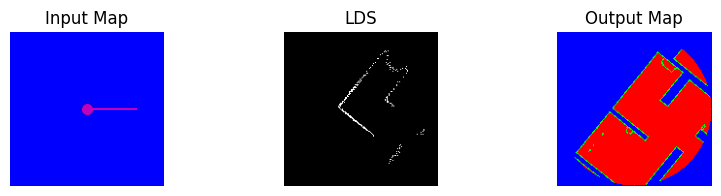

input_map:  (159, 159, 3)
lds_map:    (159, 159)
output_map: (159, 159, 3)
adlo:       [ 1.          0.06650611 -0.1320825  -0.31531525]
metadata:   [2.0000000e+00 2.0000000e+00 1.2393085e+04 1.5160209e+03 0.0000000e+00
 1.2865870e+04 5.7706079e+02 2.2837534e+00]


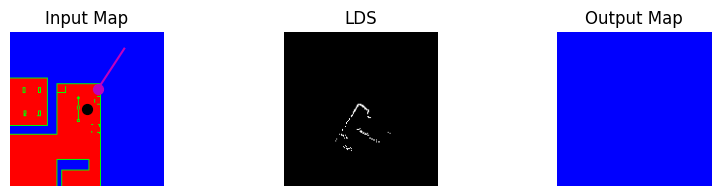

input_map:  (159, 159, 3)
lds_map:    (159, 159)
output_map: (159, 159, 3)
adlo:       [ 1.          0.08753846  0.48659375 -0.07261062]
metadata:   [2.0000000e+00 2.0000000e+00 5.3261099e+03 1.4369366e+03 0.0000000e+00
 5.9484111e+03 4.8960781e+03 1.1705631e+00]


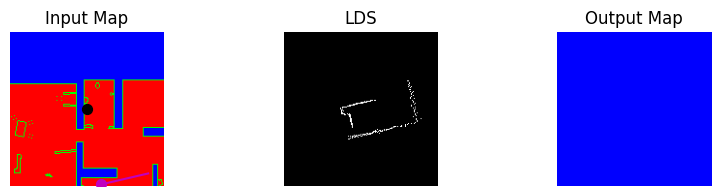

input_map:  (159, 159, 3)
lds_map:    (159, 159)
output_map: (159, 159, 3)
adlo:       [1. 0. 0. 0.]
metadata:   [2.0000000e+00 0.0000000e+00           nan           nan           nan
 1.1377892e+04 1.6338907e+03 2.9138200e+00]


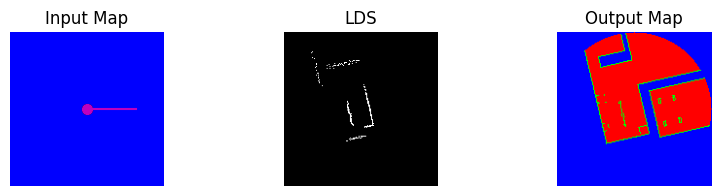

input_map:  (159, 159, 3)
lds_map:    (159, 159)
output_map: (159, 159, 3)
adlo:       [ 1.         -0.04257149 -0.08866958  0.0635903 ]
metadata:   [ 2.0000000e+00  1.0000000e+00  3.1065562e+03  5.0983755e+03
  0.0000000e+00  2.8039202e+03  4.4680332e+03 -4.6301708e-01]


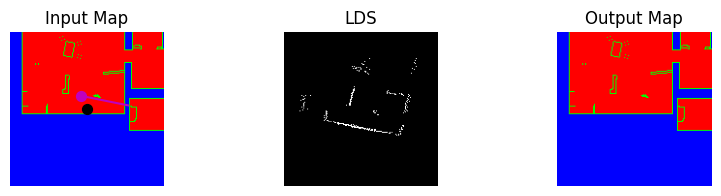

In [ ]:
reload(slam_data)
np.random.seed(0)
dataset = slam_data.generate_training_data(floorplan, 1000)
slam_data.validate_dataset(dataset)
slam_data.show_dataset(dataset)

In [ ]:
slam_data.save_dataset(dataset, 'test.npz')
#slam_data.save_dataset(dataset, 'experimental-slam-training-data2.npz')

Saving:
  input_maps:  (1000, 159, 159, 3)
  lds_maps:    (1000, 159, 159)
  output_maps: (1000, 159, 159, 3)
  adlos:       (1000, 4)
  metadatas:   (1000, 8)
Dataset saved to repo/data/experimental-slam-training-data2.npz


Loaded:
  input_maps:  (5, 159, 159, 3) x float32
  lds_maps:    (5, 159, 159) x float32
  output_maps: (5, 159, 159, 3) x float32
  adlos:       (5, 4) x float32
  metadatas:   (5, 8) x float32
Dataset loaded from test.npz
Dataset tests passed (5 entries verified)
input_map:  (159, 159, 3)
lds_map:    (159, 159)
output_map: (159, 159, 3)
adlo:       [1. 0. 0. 0.]
metadata:   [2.0000000e+00 0.0000000e+00           nan           nan           nan
 7.7704326e+03 5.2244917e+03 2.2490387e+00]


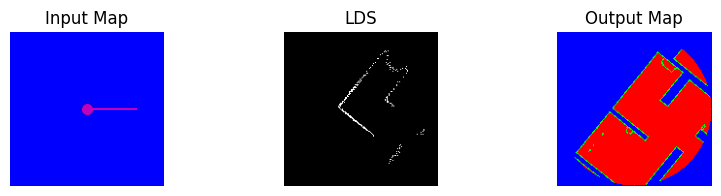

input_map:  (159, 159, 3)
lds_map:    (159, 159)
output_map: (159, 159, 3)
adlo:       [ 1.          0.06650611 -0.1320825  -0.31531525]
metadata:   [2.0000000e+00 2.0000000e+00 1.2393085e+04 1.5160209e+03 0.0000000e+00
 1.2865870e+04 5.7706079e+02 2.2837534e+00]


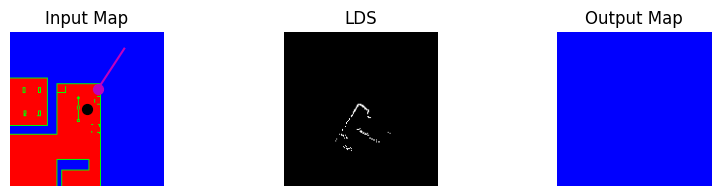

input_map:  (159, 159, 3)
lds_map:    (159, 159)
output_map: (159, 159, 3)
adlo:       [ 1.          0.08753846  0.48659375 -0.07261062]
metadata:   [2.0000000e+00 2.0000000e+00 5.3261099e+03 1.4369366e+03 0.0000000e+00
 5.9484111e+03 4.8960781e+03 1.1705631e+00]


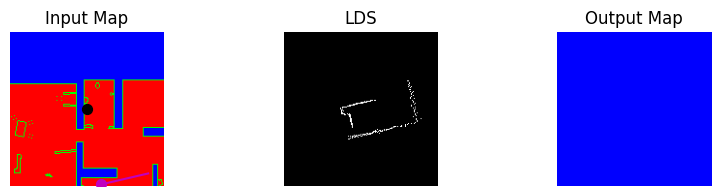

input_map:  (159, 159, 3)
lds_map:    (159, 159)
output_map: (159, 159, 3)
adlo:       [1. 0. 0. 0.]
metadata:   [2.0000000e+00 0.0000000e+00           nan           nan           nan
 1.1377892e+04 1.6338907e+03 2.9138200e+00]


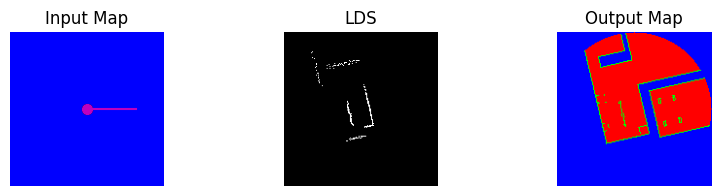

input_map:  (159, 159, 3)
lds_map:    (159, 159)
output_map: (159, 159, 3)
adlo:       [ 1.         -0.04257149 -0.08866958  0.0635903 ]
metadata:   [ 2.0000000e+00  1.0000000e+00  3.1065562e+03  5.0983755e+03
  0.0000000e+00  2.8039202e+03  4.4680332e+03 -4.6301708e-01]


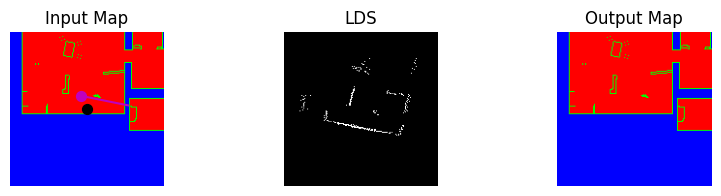

In [ ]:
reload(slam_data)
loaded = slam_data.load_dataset('test.npz')
slam_data.validate_dataset(loaded)
slam_data.show_dataset(loaded)

Note: upgraded adlos datatype from float64.
Loaded:
  input_maps:  (1000, 149, 149, 3) x float32
  lds_maps:    (1000, 149, 149) x float32
  output_maps: (1000, 149, 149, 3) x float32
  adlos:       (1000, 4) x float32
  metadatas:   (1000, 8) x float32
Dataset loaded from repo/data/experimental-slam-training-data1.npz
Dataset tests passed (1000 entries verified)
input_map:  (149, 149, 3)
lds_map:    (149, 149)
output_map: (149, 149, 3)
adlo:       [1. 0. 0. 0.]
metadata:   [nan nan nan nan nan nan nan nan]


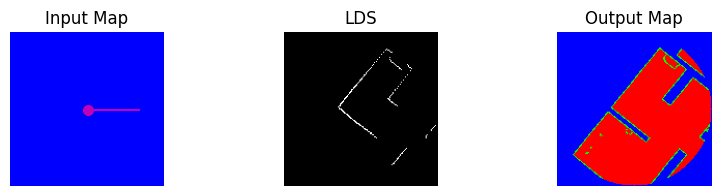

input_map:  (149, 149, 3)
lds_map:    (149, 149)
output_map: (149, 149, 3)
adlo:       [0. 0. 0. 0.]
metadata:   [nan nan nan nan nan nan nan nan]


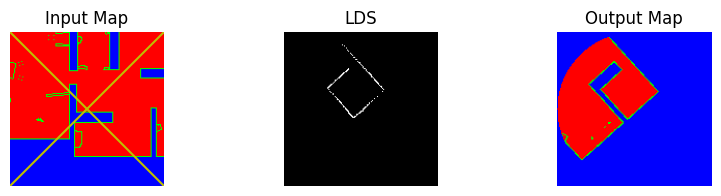

input_map:  (149, 149, 3)
lds_map:    (149, 149)
output_map: (149, 149, 3)
adlo:       [ 1.          0.33607876 -0.16260384  0.29634374]
metadata:   [nan nan nan nan nan nan nan nan]


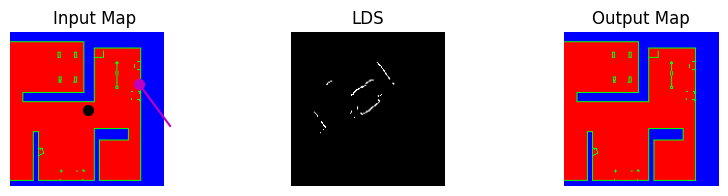

input_map:  (149, 149, 3)
lds_map:    (149, 149)
output_map: (149, 149, 3)
adlo:       [1. 0. 0. 0.]
metadata:   [nan nan nan nan nan nan nan nan]


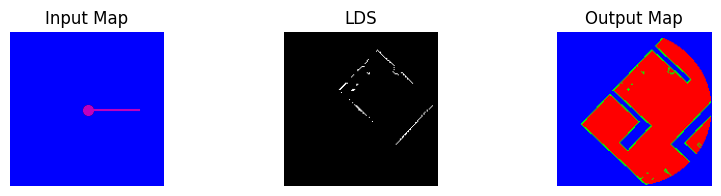

input_map:  (149, 149, 3)
lds_map:    (149, 149)
output_map: (149, 149, 3)
adlo:       [1.         0.17887953 0.22063266 0.16403958]
metadata:   [nan nan nan nan nan nan nan nan]


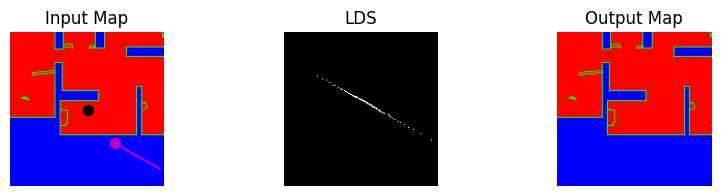

In [ ]:
reload(slam_data)
loaded = slam_data.load_dataset('repo/data/experimental-slam-training-data1.npz')
slam_data.validate_dataset(loaded)
slam_data.show_dataset(loaded)

In [ ]:
isinstance(np.zeros((1,3)), float)

False